In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
def runc(start):
    
    if start < 1:
        raise ValueError("'start' must be larger than 0.")
    
    seq = [start]
    
    while seq[-1] != 1:
        if np.mod(seq[-1], 2) == 0:
            seq.append(seq[-1] / 2)
        else:
            seq.append(3 * seq[-1] + 1)
        
    return seq

def runc_st_only(start):
    
    if start < 1:
        raise ValueError("'start' must be larger than 0.")
    
    x = start
    c = 0
    
    while x != 1:
        if np.mod(x, 2) == 0:
            x = x / 2
        else:
            x = 3 * x + 1
        
        c += 1
    
    return c

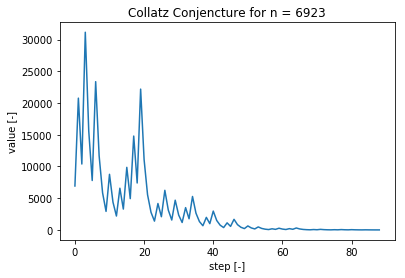

In [3]:
plt.plot(runc(6923))
plt.title('Collatz Conjencture for n = 6923')
plt.xlabel('step [-]')
plt.ylabel('value [-]')
plt.show()

In [23]:
%%timeit -r 5
rstovec = np.vectorize(runc_st_only)
z = rstovec(np.arange(1, 10000))

2.73 s ± 47.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [24]:
%%timeit -r 5
z = list(map(runc_st_only, range(1, 10000)))

2.84 s ± 146 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [25]:
%%timeit -r 5
z = [runc_st_only(i) for i in range(1, 10000)]

2.97 s ± 259 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


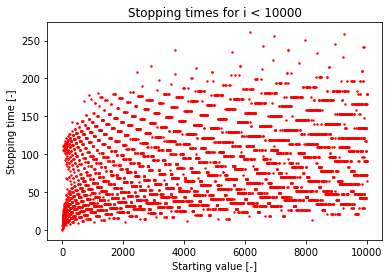

In [30]:
plt.scatter(list(range(1, 10000)), z, s = 2, c = 'r')
plt.title('Stopping times for i < 10000')
plt.xlabel('Starting value [-]')
plt.ylabel('Stopping time [-]')
plt.show()